# [ECS763P] - Natural Language Processing

## Lecture 2 notes:

Running points:
-  Preprocessing text helps in removing unnecessary information
-  shakespeare corpus used `'d` for past tennse >>intersting<<
-  Maximum matching algorithm works well with chinese language, but not really with the english. So understand and analyse the language to see which one to use
-  **language is ambiguous**; There are a lot of problems in the pre-processing. Look at those
-  Why is stemming the way it is? who defines the rules for these things? why is it faster? Compare and evaluate the lemmatization and stemming
-  so does stemming and lemmatization not work for anything other than classification?
-  how can we optimise the model generalisation over data
-  What are features? how to choose the features and what are the different ways to identify new features and also pootentially create new ones
-  Evaluation metrics, how to understand
-  how to choose weights
-  Error Analysis - how to balance the dataset so that the classification works well

## Run these cells before starting your reading

In [10]:
from IPython.display import Image, display
def yourTake(userPhrase):
    words_set = {'grouping', 'organizing', 'labeling', 'dividing', 'arranging', 
             'assigning', 'sorting', 'categorizing', 'classifying', 'separating'}
    if any(word in userPhrase.split() for word in words_set):
        return "Nice work, let's expand on that"
    else:
        return "Close, let's dive deeper into it"


def smartyPants(userPhrase):
    if ('ec' in userPhrase) or ('first 2' in userPhrase):
        display(Image(filename='images/thumbs-up-nod.gif'))
        return "Exactly, the first 2 characters"
    else:
        return "In our case the first 2 characters help us"


In [2]:
import nltk
import pandas as pd
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk import pos_tag

nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

def get_wordnet_pos(treebank_tag):
    if treebank_tag.startswith('J'):
        return 'a'
    elif treebank_tag.startswith('V'):
        return 'v'
    elif treebank_tag.startswith('N'):
        return 'n'
    elif treebank_tag.startswith('R'):
        return 'r'
    else:
        return None

def highlight_words(s):
    styles = []
    for index, row in s.iterrows():
        if row['Word'] != row['Stemmed']:
            styles.append(['color: blue', 'color: green', 'color: red'])
        else:
            styles.append(['color: green', 'color: green', 'color: green'])
    return pd.DataFrame(styles, index=s.index, columns=s.columns)

def checkLemmaAndStemma(sentence):
    tokens = sentence.lower().strip().split()
    pos_tags = pos_tag(tokens)
    stemmed = [stemmer.stem(word) for word in tokens]
    lemmatized = []
    
    for word, pos in pos_tags:
        wordnet_pos = get_wordnet_pos(pos)
        if wordnet_pos:
            lemmatized.append(lemmatizer.lemmatize(word, pos=wordnet_pos))
        else:
            lemmatized.append(lemmatizer.lemmatize(word))

    df = pd.DataFrame({
        'Word': tokens,
        'Stemmed': stemmed,
        'Lemmatized': lemmatized
    })
    
    return df.style.apply(highlight_words, axis=None)

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/darksurrealya/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/darksurrealya/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


## Let's get started

When you are working with problems associated with the language, we rely on the techniques associated with the natural language processing. This ability to understand the language helps in solving complex problems. 

   <div style="text-align: center;">
       <img src="images/power-meme.jpg" alt="Example Image" width="300" height="150"/>
   </div>



As the saying goes, `With great power comes great responsibility`, Lets give it a new form in the case of NLP -> `With great solution comes, great problems.`

Solving a language problem comes with it's own challenges for ex: 
1. **Inconsistent use of words** - varying usage of words
   <div style="text-align: center;">
       <img src="images/incosistent-use-of-words.png" alt="Example Image" width="300" height="150"/>
   </div>

2. **Linguistic variations** - meaning is similar (**_it is similar, not the same_**), the way in which it is constructed is different
   <div style="text-align: center;">
       <img src="images/similar-sentences.png" alt="Example Image" width="500" height="300"/>
   </div>

3. **Redundant information in data** - most often than not, there is a lot of information that is repeated so much so that the corpus/corpora should be cleaned. One such example is **stopword removal**
   <div style="text-align: center;">
       <img src="images/stopwords.png" alt="Example Image" width="120" height="150"/>
   </div>

4. **Tokenization** - Tokenization is an important step during data preprocessing as it helps the model understand the data much better. However, what you need to understand here is there are a lot of nuances. These nuances will be covered just in a little while.

5. **Normalization** - In simple terms, it is making sense of what is given. There are two different types at a high level:
   - Symmetric normalization
   - Asymmetric normalization

   More in detail a little later.

6. **Sentence segmentation** - When punctuation comes in your way, and not having it is the best. We will dive a little deeper into this too in the following sections.


Now that we kind of outlined that there are a lof of challenges, let's put all these problems under 1 umbrella. So let me think of a name to give

...thinkinnnnnnng

...thinkinnnnnnnggggggg

...thinn

> **Text Preprocessing**

Voila!!! Chef's kiss

Alright coming back, I know I will bomb my first stand up gig but hey! I am doing my education so hopefully I earn better (not)

So now, coming back to the story. This `Text Preprocessing` plays a crucial role in getting the data to perform for instance a text classification problem.




Even though there are a lot of problems, all these problems have solutions if we understand fully well what is causing the issue in the first place.

### Tokenization
Tokenization is the dividing the sentences in such a way that the model is able to understand the data. This is very important because it helps with learning patterns from the corpus and build model that could predict the class label accurately. 

But don’t let this fool you—it’s not just a quick slice with a regex knife! You’ve got to keep those pieces in shape so they don’t lose meaning. I mean, what’s the point of slicing up "England, Englands, and England’s" if your model thinks they’re three different countries? 

   <div style="text-align: center;">
       <img src="images/tokenization-issues.png" alt="Example Image" width="350" height="200"/>
   </div>


If you see the image carefully, how do you put a finger and say the rule for tokenizing 

Not easy right!

There are two different ways of creating your own tokenizer
1. Top down tokenizer - it is like the dictator, you set rules before looking at the data from your own understanding of what it had to say and do the tokenization. 
    One of the best example of this is the **Penn Treebank Tokenizer** from the Linguistic Data Consortium

2. Bottom up tokenizer - This is the most common

Instead of just chopping up text by words or letters, modern language models play it smart by using "subwords" – breaking words into smaller, meaningful bits. So, if they’ve never seen "lower" before, they’ll simply use "low" and "er" like puzzle pieces. **Byte-pair encoding (BPE)** and **unigram models** are the tools they use, teaching the model to combine and split chunks like pros. It's like making your model a linguistic master of Tetris!



### Some Common Tokenizers

| Tokenizer        | Library          | Features                                        |
|------------------|------------------|-------------------------------------------------|
| <span style="color:green">NLTK Tokenizer</span>   | NLTK             | Word, sentence, regex, treebank tokenization    |
| <span style="color:blue">SpaCy Tokenizer</span>  | SpaCy            | Efficient, customizable, multi-language support |
| <span style="color:#DAA520">Transformers</span>     | Hugging Face     | Subword tokenization (BPE, WordPiece, Unigram)  |


### Normalization

Normalization in our case is trying to solve the problem that we see in the tokenization, how can you get a semblance of what the word is all about. This idea of getting to understand the word by trimming things down to it's true identity is what normalization is. Keep in mind this doesn't fully solve the problem of tokenization, but gives us lot less to worry about. 

So if we try to dive deep into this, we come to some techniques called lemmatization and stemming


**Lemmatization:**
Lemmatization is the language detective—it tracks words back to their roots like "ran" and "running," declaring, “Aha! It’s 'run' all along!” Always solving cases with perfect grammar.

**Stemming:**
Stemming is the word hacker—it’ll cut "playing" down to "play" or "amazing" to "amaz" without a second thought. Precise? Not really. Efficient? You bet!

Try the following exercise to understand more about the lemmatization and stemming

In [3]:
checkLemmaAndStemma(input("Monsieur/Madame what word do you want to use"))

Monsieur/Madame what word do you want to use I am shivering and I know it


,Word,Stemmed,Lemmatized
0,i,i,i
1,am,am,be
2,shivering,shiver,shiver
3,and,and,and
4,i,i,i
5,know,know,know
6,it,it,it


**Before we dive into the what is text classification problem. Write down what you understand of text classification in a sentence?**

In [4]:
yourTake(input('What do you understand from text classification?').lower())

What do you understand from text classification? grouping


"Nice work, let's expand on that"

### So what is Text classification?
![Text Classification](images/what-is-text-classification.png)


Text classification is classifying the text ot it's concerned group. For instance in the case of students, based on the id number provided there is information that would reflect which department they belong to - ecxxxxxx is your number so I know you belong to the stream of electronics and computer science department.

but wait did you not get the question that I got while writing this example - `How do you know that the id belonged to the Electronics and Computer science department`. If you know please answer below


Can you try guessing it? ec


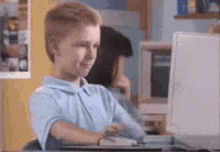

'Exactly, the first 2 characters'

In [11]:
smartyPants(input("Can you try guessing it?").lower())

Hence there are 2 ways in which we can train the model
1. Supervised Learning
2. Unsupervised Learning


The id card example is a case of supervised learning. Today let us dive a little into how supervised learning works


_Text preprocessing_ that was done prior helps the machine to identify the patterns and there by assign a designated label to which it may belong. This way of a controlled environment where you know what it belongs to is called as a supervised learning

Hence, 
<p style="text-align: center;">
    <img src = "images/Text_Classification_Machine_Learning_NLP.png", alt = "Classification" width = "500"/>
</p>
Here the dataset is represented as d, and the final labels as C, hence for any new example that comes our way

$$
c^* \in C
$$
where:
- $( C )$ is the set of all possible classes.
- $( c^* )$ is the target class that the algorithm predicts for a given input \( x \).

The classification task can be summarized as finding a function ( f: x &rarr; C)
 that maps input data points $( x )$ from the feature space $( X )$ to their corresponding classes in $( C )$.

So yeah, that's about it; that is how we train the model. Goodbye, thank you!<br>
<p style="text-align: center;">
    <img src="images/bye-girl.gif" alt="Bye" width="300"/> <!-- Adjust the width as needed -->
</p>

Well not so easy my friend, this doesn't end our problems. 




Let us now dive into what it takees to do the classification, what are the stages that are there before we get the final product out

![Stages of development](images/stages.png)



### Feature Engineering
>_disclaimer: feature is nothing but a column in the dataset_

Feature engineering is when you try different costumes to see what works best for you, if need be you create something new like getting a haircut or buying a shoe just for complimenting the look. Feature engineering just like that needs your help to see what information from the dataset helps your model to better perform.

but how would you know whether that feature/ column information is helping your model. This can be done using some **Empircal Evaluation**, they are
- Incremental testing: adding one feature at a time to see the performance of the model
- Leave-one-out testing: out of all the columns, if you think a column wouldn't really help then remove and see (trial and error)
- Error analysis: it is about retrospecting on the mistake after making one, you look at the performance and see how the data is impacting it. For instance, a good example would be having an imbalanced dataset that you have not handled before developing the model. We fix that and come back here.

You can learn more about feature engineering here: https://www.kaggle.com/learn/feature-engineering

#### Performance evaluation
There are various ways of evaluating a model, firstly we need to understand what kind of problem we have at our hand and then consider the evaluation metric.

For instance, if we consider a **Binary Classification**

1. Precision:

How it helps: Measures the accuracy of positive predictions. High precision means fewer false positives, which is crucial in scenarios where false alarms are costly (e.g., spam detection).

2. Recall:

How it helps: Measures the ability to capture all actual positives. High recall is vital when missing a positive instance is detrimental (e.g., in medical diagnoses, where missing a disease can be harmful).

3. F1 Score:

How it helps: Combines precision and recall into a single score to assess model performance, especially useful in imbalanced datasets. A high F1 score indicates a good balance between precision and recall, ensuring that both false positives and false negatives are minimized.

So in short:
- Precision focuses on minimizing false positives.
- Recall emphasizes minimizing false negatives.
- F1 Score balances both metrics, making it ideal for evaluating models where both types of errors matter.

<table>
    <tr>
        <td><img src="images/matrix.png" alt="Image 2" width="700"/></td>
        <td><img src="images/f1score.png" alt="Image 1" width="700"/></td>
    </tr>
</table>

$$generally \ \beta = 1$$



In the case of **Multiclass Classification**, we use something called as the **confusion matrix**
<p style="text-align: center;">
    <img src="images/confusion-matrix.png" alt="Image 2" width="700"/>
</p>

This is really helpful to understand how a particular column is performing, and how many of them are getting wrongly labelled. This helps us in making a decision whether we want to correct the model such that it doesn't go into other labels or not.

> Here’s where an important concept comes into play: **overfitting**. Overfitting occurs when you try to train a model on more data to help it learn specific patterns better. However, this can be problematic because the model may misclassify many labels simply because it recognizes a pattern that is somewhat similar to the actual label.

Coming back to the evaluation of multiclass, we also calculate precision and recall to see how well it is able to learn and retain information on the unseen data. These are calculated using

<p style="text-align: center;">
    <img src="images/mc-pre-re.png" alt="Image 2" width="700"/>
</p>

When evaluating the performance of classification models, especially in multi-class settings, it’s important to summarize individual class metrics into a single score. Two common techniques for doing this are **micro averaging** and **macro averaging**. Here’s a brief overview of both methods:

**Micro Averaging**
Micro averaging aggregates the contributions of all classes to compute the average metric. It does this by summing the true positives, false positives, and false negatives across all classes before calculating the precision, recall, or F1 score. This approach treats each instance equally, making it particularly useful when the class distribution is imbalanced.

- Advantages:

    - Provides a more balanced view when dealing with imbalanced datasets.
    - Highlights the model's performance on the majority class.

      Example: If there are three classes with the following confusion matrix:
        
          Class A: 10 TP, 5 FP, 2 FN
          Class B: 15 TP, 2 FP, 3 FN
          Class C: 20 TP, 3 FP, 1 FN
        Micro averages would sum these values across all classes and then compute metrics.

**Macro Averaging**
Macro averaging, on the other hand, calculates the metric independently for each class and then takes the average of those values. This means that all classes contribute equally to the final score, regardless of their support (the number of instances in each class). This method is beneficial when you want to evaluate the model's performance across all classes equally, especially if they have different importance or relevance.

- Advantages:

    - Gives equal weight to all classes, which can be crucial when some classes are more important than others.
    - Useful for understanding the model’s performance on minority classes.

      Example: Using the same confusion matrix:
        
          Class A: Precision = TP / (TP + FP)
          Class B: Precision = TP / (TP + FP)
          Class C: Precision = TP / (TP + FP)
        The macro average precision would be the mean of the precision scores from each class.